In [1]:
    #libraries import
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from functions import *

In [2]:
# data read and types check
df = pd.read_csv("ortologs_full_table.csv")
print(df.shape)
print(df.dtypes)
df.head()

(124, 6299)
pond       object
K00001    float64
K00003    float64
K00004    float64
K00005    float64
           ...   
K12292    float64
K12293    float64
K19273    float64
K19299    float64
K19429    float64
Length: 6299, dtype: object


,pond,K00001,K00003,K00004,K00005,K00009,K00010,K00012,K00013,K00014,...,K18364,K19075,K19088,K19090,K05988,K12292,K12293,K19273,K19299,K19429
0,S08,121.00,2010.84,221.0,4104.50,5246.00,183.00,7449.84,6168.84,6386.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,S08,70.00,3880.67,64.0,3758.50,6821.00,1.00,10281.67,6992.67,7375.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S08,155.00,2125.67,72.0,5275.00,6638.75,123.00,9043.42,7181.42,7499.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,S08,214.66,3895.16,57.0,5396.57,8367.66,2.00,12078.82,8575.82,9077.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S09,2271.34,765.34,81.0,6644.12,4271.64,172.98,5271.14,5174.14,5393.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# checking for uniformity of  records
df['pond'].value_counts().values

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 4], dtype=int64)

In [4]:
# as we are missing one row from our Gut_s8 pond we will add it with values 0
# create zero row 
zeros_row = pd.DataFrame([[0] * len(df.columns)], columns=df.columns)
zeros_row['pond'] = 'S08'
# add zero row to dataframe
df = pd.concat([df, zeros_row], ignore_index=True)


In [5]:
# filling missing values with 0 
df = df.fillna(0)
df_2 = df 
df_2.iloc[:,1:] = df_2.iloc[:,1:].astype("float32")
df = df_2
df.head()

,pond,K00001,K00003,K00004,K00005,K00009,K00010,K00012,K00013,K00014,...,K18364,K19075,K19088,K19090,K05988,K12292,K12293,K19273,K19299,K19429
0,S08,121.000000,2010.839966,221.0,4104.500000,5246.000000,183.000000,7449.839844,6168.839844,6386.339844,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,S08,70.000000,3880.669922,64.0,3758.500000,6821.000000,1.000000,10281.669922,6992.669922,7375.169922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,S08,155.000000,2125.669922,72.0,5275.000000,6638.750000,123.000000,9043.419922,7181.419922,7499.419922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,S08,214.660004,3895.159912,57.0,5396.569824,8367.660156,2.000000,12078.820312,8575.820312,9077.820312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,S09,2271.340088,765.340027,81.0,6644.120117,4271.640137,172.979996,5271.140137,5174.140137,5393.459961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df2 = df.sort_values(by=['pond'])
df2=df2.reset_index(drop = True)
df=df2

In [7]:
print(df.shape)
df.describe()

(125, 6299)


,K00001,K00003,K00004,K00005,K00009,K00010,K00012,K00013,K00014,K00016,...,K18364,K19075,K19088,K19090,K05988,K12292,K12293,K19273,K19299,K19429
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.00000,125.00000,125.00000,125.00000,125.00000
mean,1064.031203,2210.864158,175.787040,5222.379018,3624.571053,1030.137763,6101.402656,4861.106980,6752.100389,2255.614639,...,0.052800,0.052800,0.052800,0.052800,0.061280,0.03000,0.03000,0.03000,0.03000,0.03000
std,1179.681238,1799.867048,226.421059,5313.003243,2945.347089,2840.731896,3237.373589,2983.523737,5298.550921,2135.477462,...,0.505546,0.505546,0.505546,0.505546,0.685131,0.33541,0.33541,0.33541,0.33541,0.33541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,192.839996,684.500000,38.000000,3125.090088,1739.069946,99.000000,4202.080078,3243.159912,4507.830078,611.669983,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,669.989990,1926.510010,105.379997,4161.910156,3026.489990,336.000000,5306.180176,4184.040039,5551.080078,1825.040039,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,1619.660034,3065.830078,241.000000,5480.799805,4471.029785,690.280029,7030.970215,5694.310059,7051.830078,3014.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000
max,6006.990234,9602.459961,1724.000000,46551.968750,23252.150391,23360.650391,23934.150391,23386.150391,47178.640625,11435.000000,...,5.600000,5.600000,5.600000,5.600000,7.660000,3.75000,3.75000,3.75000,3.75000,3.75000


Becouse we have a lot of big numbers and a lot of variation between collumns we might try to normalise the data for better results, on the other hand we could also not normalise so itll be easier for model to discover differences between bacteria abduance as a predictor value. our next steps are:
- plot our data to see for any outliers (ask prof) ew. outlier treatment 
- convert classification variable (target variable)
- create predictors and target varaiable sets
- normalise predictors set 

## Data formatting and normalisation

In [8]:
# replacing zeroes with small number
df.iloc[:,1:] = df.iloc[:,1:].replace(0,0.00001)

In [9]:
#normalisation by collumns
#df[predictors]=df[predictors]/df[predictors].max()

#normalisation by rows but only for not aggregated  data (not used now)
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda row: row / row.max(axis=0), axis=0)

#checksum
#df.iloc[1,1:].sum()

In [10]:
df.describe()

,K00001,K00003,K00004,K00005,K00009,K00010,K00012,K00013,K00014,K00016,...,K18364,K19075,K19088,K19090,K05988,K12292,K12293,K19273,K19299,K19429
count,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,1.250000e+02,...,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,1.771322e-01,2.302394e-01,1.019646e-01,1.121838e-01,1.558811e-01,4.409714e-02,2.549246e-01,2.078626e-01,1.431177e-01,1.972553e-01,...,0.009430,0.009430,0.009430,0.009430,0.008001,0.008003,0.008003,0.008003,0.008003,0.008003
std,1.963847e-01,1.874381e-01,1.313347e-01,1.141306e-01,1.266699e-01,1.216033e-01,1.352617e-01,1.275765e-01,1.123083e-01,1.867492e-01,...,0.090276,0.090276,0.090276,0.090276,0.089443,0.089442,0.089442,0.089442,0.089442,0.089442
min,1.664727e-09,1.041400e-09,5.800464e-09,2.148137e-10,4.300677e-10,4.280703e-10,4.178130e-10,4.276035e-10,2.119603e-10,8.745081e-10,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
25%,3.210260e-02,7.128382e-02,2.204176e-02,6.713121e-02,7.479179e-02,4.237896e-03,1.755684e-01,1.386787e-01,9.554811e-02,5.349103e-02,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
50%,1.115351e-01,2.006267e-01,6.112529e-02,8.940353e-02,1.301596e-01,1.438316e-02,2.216991e-01,1.789110e-01,1.176609e-01,1.596012e-01,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
75%,2.696292e-01,3.192755e-01,1.397912e-01,1.177351e-01,1.922846e-01,2.954884e-02,2.937631e-01,2.434907e-01,1.494708e-01,2.635767e-01,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## conversion of class variable


Explanation of pond coding
| number | setup | pond numbers | water supplementation | feed suplementation |
|---|---|---|---|---|
|0|control | 8,14,18,24,29|NO|NO|
|1|set 1 | 12,16,19,23,26|Em farma|NO|
|2|set 2 | 10,21,28,30,32|Em farma|EM|
|3|set 3 | 9,13,17,20,27|EM|NO|
|4|set 4 | 11,15,22,25,31|EM|EM|

In [11]:
#creting decoder 

def pond_decoder(x,codes):
    
    x=x.replace('S','')
    num = int(x)
    
    
    for key, value_list in codes.items():
        if num in value_list:
            return key
    
    return None   
pond_decoder("S09",codes = {0 : [8,14,18,24,29], 1: [12,16,19,23,26], 2 : [10,21,28,30,32], 3 : [9,13,17,20,27], 4 : [11,15,22,25,31]})

3

## Creating X and y

In [12]:
print(df.shape)
df.head()

(125, 6299)


,pond,K00001,K00003,K00004,K00005,K00009,K00010,K00012,K00013,K00014,...,K18364,K19075,K19088,K19090,K05988,K12292,K12293,K19273,K19299,K19429
0,S08,2.014320e-02,2.094088e-01,1.281903e-01,8.817028e-02,2.256135e-01,7.833686e-03,3.112640e-01,2.637818e-01,1.353651e-01,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
1,S08,3.573503e-02,4.056419e-01,3.306265e-02,1.159257e-01,3.598661e-01,8.561405e-05,5.046689e-01,3.667051e-01,1.924138e-01,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
2,S08,1.664727e-09,1.041400e-09,5.800464e-09,2.148137e-10,4.300677e-10,4.280703e-10,4.178130e-10,4.276035e-10,2.119603e-10,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
3,S08,1.165309e-02,4.041329e-01,3.712297e-02,8.073772e-02,2.933492e-01,4.280703e-05,4.295816e-01,2.990090e-01,1.563243e-01,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
4,S08,2.580327e-02,2.213672e-01,4.176334e-02,1.133142e-01,2.855112e-01,5.265264e-03,3.778459e-01,3.070800e-01,1.589579e-01,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003


In [13]:
# creation of X and y 
X = df.iloc[:,1:].to_numpy().astype('float32')
X=X.reshape(125,6298,1)
y=df['pond']
print(X.shape,y.shape)


(125, 6298, 1) (125,)


In [14]:
# converting y to experimental setups 
codes = {0 : [8,14,18,24,29], 1: [12,16,19,23,26], 2 : [10,21,28,30,32], 3 : [9,13,17,20,27], 4 : [11,15,22,25,31]}
y5 = np.array([pond_decoder(yi,codes) for yi in y])
print(type(y5))
y_classes5 = y5
codes2 = {0 : [8,14,18,24,29,12,16,19,23,26,9,13,17,20,27],1 : [10,21,28,30,32,11,15,22,25,31]}
y2 = np.array([pond_decoder(yi,codes2) for yi in y])
print(type(y2))
y_classes2 = y2

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
#chnging to category variable
y5 = keras.utils.to_categorical(y5, 5)
print(y5.shape)
y2 = keras.utils.to_categorical(y2, 2) 
print(y2.shape)

(125, 5)
(125, 2)


## Splitting data into train and test sets

In [16]:
# creating test train and validation set 

X_train, X_test, y_train, y_test = train_test_split(X,y5,test_size=0.2,random_state=111,stratify = y5)
#X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size = 0.33, random_state = 111, stratify =y_test_val)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(100, 6298, 1) (25, 6298, 1) (100, 5) (25, 5)


At this point we should have test set with size of 25 and training set with size of 100 ready for later moddeling 

# Model building, compiling, fitting

My initial strategy as we have not much data is to have some more dropout to prevent overfitting and lower learning rate as well as more epochs to compensate for dropout.
- For loss function we will use [caterogical crossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) as we have several labeled categories
- For metrics we will use [sparse caterogical crossentropy](https://keras.io/api/metrics/probabilistic_metrics/#categoricalcrossentropy-class) as it works well with our integer mutliclass predictor variable
- For optimizer we will chose Adam as it is an usual choice [optimzier choosing](https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e) we will set small learning rate at beggining but it might be that our network will rapidly stop learning becouse of that, in that case it is neccesary to update learning rate to bigger number
- As in this approach we will be building CNN's we will have one 1 dimensional convolutional layer
- No maxpooling layer as we dont want to lose information about position and as it is for temporal data 

## model building and compiling


In [17]:
model1 = keras.Sequential()



model1.add(keras.layers.Conv1D(filters=3, kernel_size=5, activation='relu',input_shape = (6298,1)))
model1.add(keras.layers.Conv1D(filters=2, kernel_size=3, activation='relu'))


model1.add(Flatten())
model1.add(keras.layers.Dense(128, activation = 'relu'))
model1.add(keras.layers.Dropout(rate = 0.25))
model1.add(keras.layers.Dense(64, activation = 'relu'))


model1.add(keras.layers.Dense(16, activation = 'relu'))



model1.add(keras.layers.Dense(5, activation ='softmax'))

model1.summary()

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 6294, 3)        │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 6292, 2)        │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12584)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,610,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,620,299 (6.18 MB)

 Trainable params: 1,620,299 (6.18 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model1.compile(optimizer = optimizer, loss = loss, metrics=metrics)

### model fiting 

as we said before we will try to use much epochs and see the results

In [19]:

history1=model1.fit(X_train, y_train, epochs = 200, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_test, y_test))# validation_data=(X_val, y_val))


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.2144 - loss: 1.6066 - val_accuracy: 0.2800 - val_loss: 1.5930
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3588 - loss: 1.5505 - val_accuracy: 0.3200 - val_loss: 1.5739
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3774 - loss: 1.5251 - val_accuracy: 0.3200 - val_loss: 1.5521
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3720 - loss: 1.4961 - val_accuracy: 0.3600 - val_loss: 1.5391
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3991 - loss: 1.4270 - val_accuracy: 0.3600 - val_loss: 1.4802
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3230 - loss: 1.4705 - val_accuracy: 0.3600 - val_loss: 1.5052
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4924 - loss: 1.2357 - val_accuracy: 0.3200 - val_loss: 1.4462
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4625 - loss: 1.2669 - val_accuracy: 0.3600 -

# model evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5600 - loss: 3.0066
[3.0066449642181396, 0.5600000023841858]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted values: [2 2 1 4 1 1 2 4 3 1 0 1 0 0 4 4 3 0 2 2 0 4 3 1 3]
True values: [4 4 1 0 3 1 2 3 3 2 1 1 2 0 4 2 3 0 4 2 0 4 3 1 0]


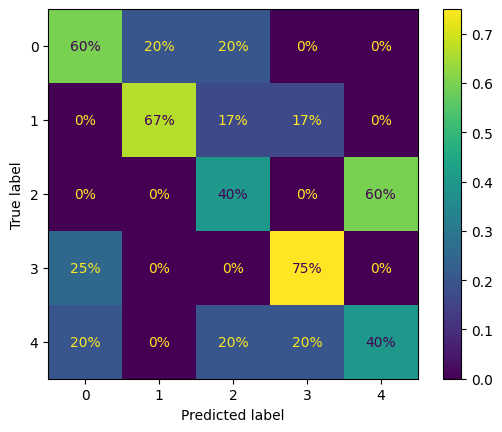

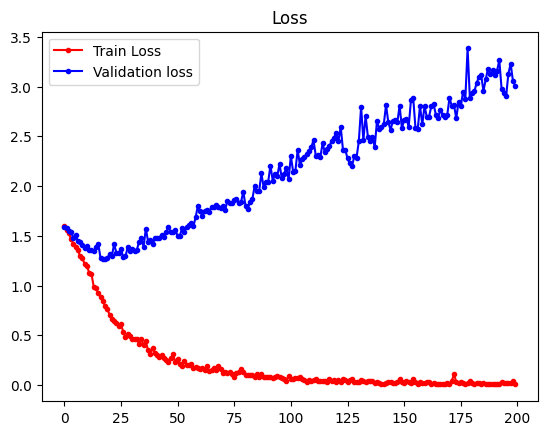

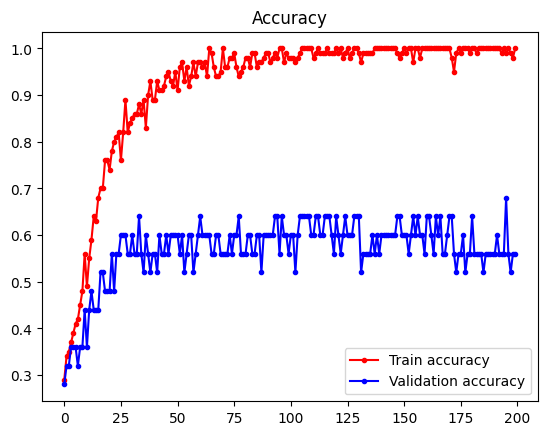

In [20]:
evaluate_model(model1, history1, X_test, y_test)

In [21]:
y_pred = model1.predict(X)

print(y_pred[:1])
# we need to convert those to classes 
y_pred_class = y_pred.argmax(axis=1)
print(y_pred_class[:1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 
[[9.07357395e-01 5.80295055e-05 1.08704099e-03 9.13792104e-02
  1.18366865e-04]]
[0]


In [22]:
print(y_pred_class)
y_pred_list = y_pred_class.tolist()#classes
#plot(y_pred_list)

[0 0 4 0 0 3 3 3 3 3 2 2 2 2 2 4 4 4 4 4 1 1 1 1 1 3 3 3 3 3 0 0 0 0 0 4 4
 4 4 4 1 1 1 1 1 3 3 3 3 1 0 0 0 0 0 0 1 1 1 1 3 3 3 3 3 2 2 0 2 2 4 4 4 4
 4 1 1 1 1 1 0 3 0 0 0 4 4 4 4 2 1 1 1 1 1 3 3 3 3 4 2 2 2 2 1 0 0 0 0 0 2
 2 2 2 2 2 4 4 4 2 2 2 2 2 4]


In [23]:
print(model1.evaluate(X_train,y_train))
print(model1.evaluate(X_test,y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0042 
[0.0035573390778154135, 1.0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5600 - loss: 3.0066
[3.0066449642181396, 0.5600000023841858]


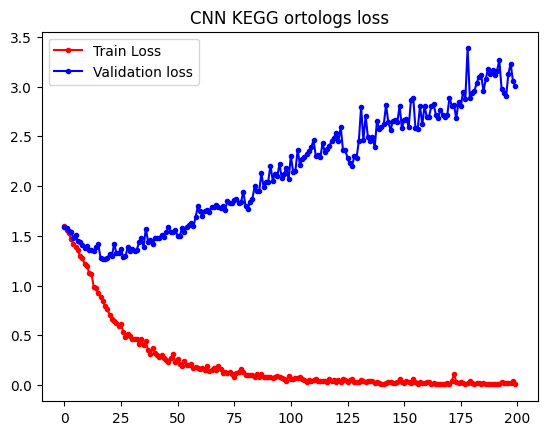

In [24]:
title = "CNN KEGG ortologs loss"
fig, ax = plt.subplots()
ax.plot(history1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(history1.history["val_loss"],'b', marker='.', label="Validation loss")
plt.title(title)
ax.legend()
#plt.savefig(title+'.png')

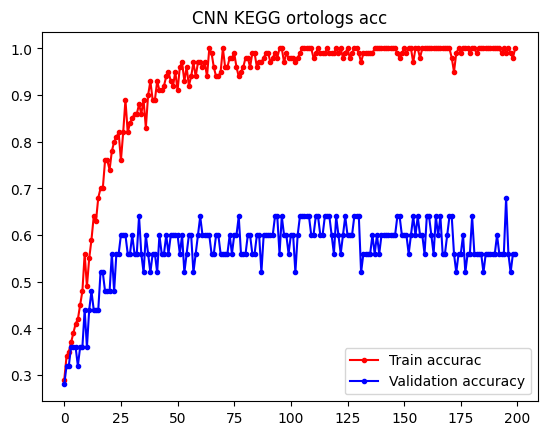

In [25]:
title = "CNN KEGG ortologs acc"
fig, ax = plt.subplots()
ax.plot(history1.history["accuracy"],'r', marker='.', label="Train accurac")
ax.plot(history1.history["val_accuracy"],'b', marker='.', label="Validation accuracy")
plt.title(title)
ax.legend()
#plt.savefig(title+'.png')

# 2 class classification
As we saw earlier on confusion matrix model is missmatching in 2 groups [0,1,3] and [2,4] those groups are simialr with regards to feed supplementation and differ in enviromental (water) supplementation. it makes biological sense that feed supplementation has much more impact. 

In [26]:
X_train2, X_test_val, y_train2, y_test_val = train_test_split(X,y2,test_size=0.3,random_state=111,stratify = y2)
X_test2, X_val2, y_test2, y_val2 = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state = 111, stratify =y_test_val)
print(X_train2.shape,X_test2.shape,X_val2.shape ,y_train2.shape,y_test2.shape, y_val2.shape)

(87, 6298, 1) (19, 6298, 1) (19, 6298, 1) (87, 2) (19, 2) (19, 2)


## model building and compiling 
2 class classification


In [27]:
model2 = keras.Sequential()
model2.add(keras.layers.Conv1D(filters=3, kernel_size=5, activation='relu',input_shape = (6298,1)))
model2.add(keras.layers.Conv1D(filters=2, kernel_size=3, activation='relu'))


model2.add(Flatten())
model2.add(keras.layers.Dense(128, activation = 'relu'))
model2.add(keras.layers.Dropout(rate = 0.25))
model2.add(keras.layers.Dense(64, activation = 'relu'))


model2.add(keras.layers.Dense(16, activation = 'relu'))



model2.add(keras.layers.Dense(2, activation ='softmax'))

model2.summary()

C:\Users\marek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 6294, 3)        │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 6292, 2)        │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12584)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,610,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,620,248 (6.18 MB)

 Trainable params: 1,620,248 (6.18 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
loss = "categorical_crossentropy"
#metrics = "sparse_categorical_crossentropy"
metrics = ["accuracy"]
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)

model2.compile(optimizer = optimizer, loss = loss, metrics=metrics)

In [29]:
#callbacks 

es_callback = tf.keras.callbacks.EarlyStopping(patience = 5)

### model fiting 

as we said before we will try to use much epochs and see the results

In [30]:

history2=model2.fit(X_train2, y_train2, epochs = 200, verbose = 1, shuffle = True, batch_size = 3, validation_data = (X_val2, y_val2), callbacks=[es_callback])


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5976 - loss: 0.6919 - val_accuracy: 0.7368 - val_loss: 0.6818
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8568 - loss: 0.6771 - val_accuracy: 0.5789 - val_loss: 0.6503
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6922 - loss: 0.6493 - val_accuracy: 0.5789 - val_loss: 0.6133
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6984 - loss: 0.6068 - val_accuracy: 0.6316 - val_loss: 0.5623
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7587 - loss: 0.5681 - val_accuracy: 0.6842 - val_loss: 0.5284
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7847 - loss: 0.5618 - val_accuracy: 0.7895 - val_loss: 0.4740
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8133 - loss: 0.5061 - val_accuracy: 0.7895 - val_loss: 0.4636
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8720 - loss: 0.4265 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8947 - loss: 0.3907
[0.3906794786453247, 0.8947368264198303]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predicted values: [0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0]
True values: [0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0]


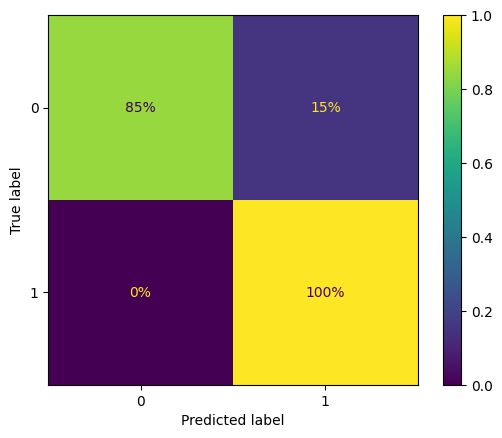

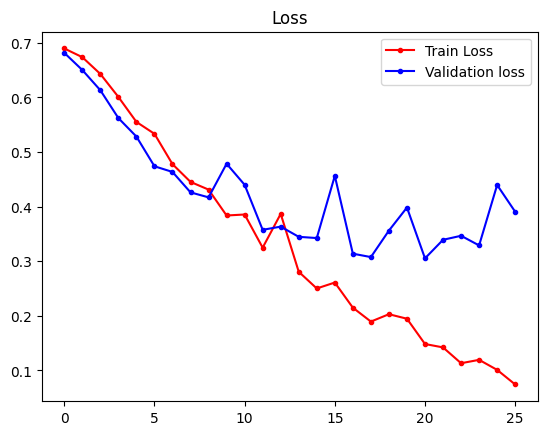

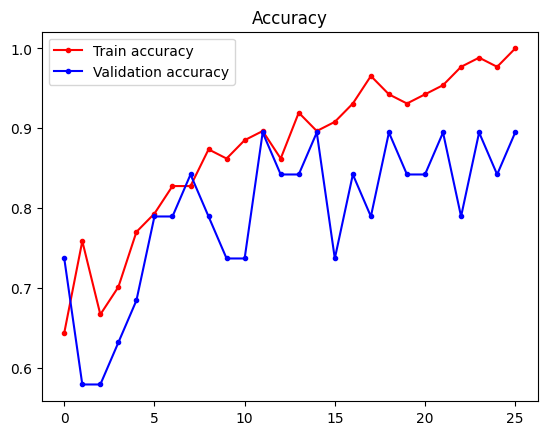

In [31]:
evaluate_model(model2, history2, X_val2, y_val2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8421 - loss: 0.3411
[0.34106409549713135, 0.8421052694320679]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted values: [1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
True values: [1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1]


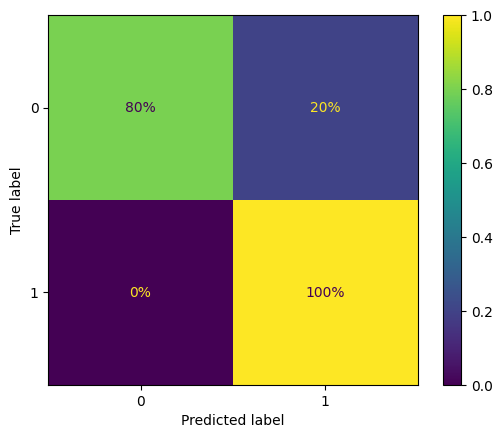

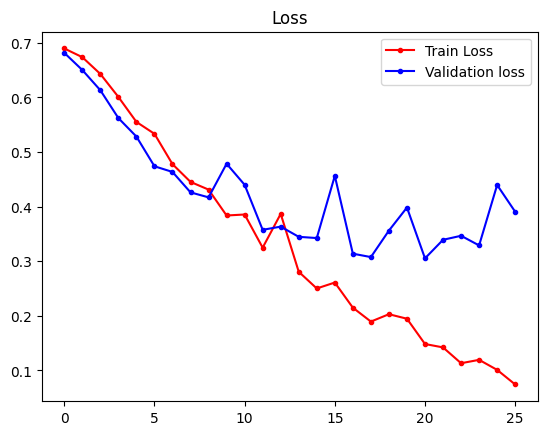

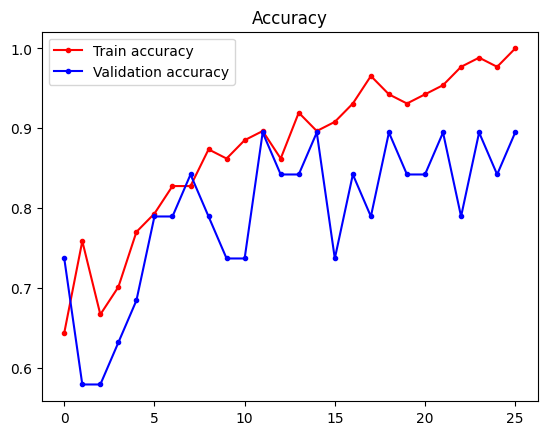

In [32]:
evaluate_model(model2,history2, X_test2, y_test2)

# Feature importance

In [33]:
from IPython.display import clear_output

In [35]:
X_test2_p = X_test2.reshape(19,6298)

In [40]:
# creating testing dataset 
df2_test_p = pd.DataFrame(X_test2_p.copy(),columns = df.columns[1:])
df2_test_p.head()

,K00001,K00003,K00004,K00005,K00009,K00010,K00012,K00013,K00014,K00016,...,K18364,K19075,K19088,K19090,K05988,K12292,K12293,K19273,K19299,K19429
0,0.413795,0.400086,0.377030,0.123306,0.111258,0.054379,0.240562,0.159908,0.144850,0.382275,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
1,0.013263,0.071926,0.004640,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.053491,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
2,0.098620,0.146317,0.444896,0.117022,0.169387,0.048865,0.212191,0.230889,0.132522,0.183694,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
3,0.008712,0.124724,0.035963,0.063531,0.119631,0.011528,0.192932,0.163074,0.101656,0.096079,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003
4,0.172244,0.042541,0.005800,0.131372,0.205030,0.004342,0.219486,0.219498,0.113840,0.018933,...,0.000002,0.000002,0.000002,0.000002,0.000001,0.000003,0.000003,0.000003,0.000003,0.000003


array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [47]:
# collumn swap with random numbers from uniform distribution (0,1)
results_dfu = pd.DataFrame(columns=['feature_name','feature_number','test_loss', 'test_acc'])
# number of iterations per feature 
N = 10


feature_name = [0]*N
feature_number = [0]*N
test_loss = [0]*N
test_acc = [0]*N
for column in df2_test_p.columns:
    
    for i in range(N):
        
        print(f"processing {column}")
        print(f'{i/N*100}% procesing {i} out of {N}')
    
        dfu_test = df2_test_p.copy()


        
        random_numbers_test = np.random.uniform(low=0, high=1, size=(dfu_test.shape[0], 1))

        
    # Update the DataFrame with the permuted column
       
        dfu_test[column] = random_numbers_test
        npa_test = dfu_test.to_numpy().astype('float32').reshape(19,6298,1)

    
        ev_test = model2.evaluate(npa_test, y_test2)

        feature_name[i]=str(column)
        feature_number[i]=i
        test_loss[i]=ev_test[0]
        test_acc[i]=ev_test[1]
        clear_output(wait=True)

    col_df = pd.DataFrame({'feature_name':feature_name,'feature_number':feature_number  ,'test_loss':test_loss ,'test_acc':test_acc })
    
    results_dfu = pd.concat([results_dfu, col_df],ignore_index = True)
    

processing K19429
90.0% procesing 9 out of 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8421 - loss: 0.3410


In [52]:
#results_dfu.to_csv("results_dfu_KEGG_orthology.csv")
results_dfu["test_acc"].value_counts()

test_acc
0.842105    62323
0.894737      657
Name: count, dtype: int64

we can see that almost all of our column alterations resulted in no change and if any change was present it did increase accuracy of the model. This approach might not be the best 


# SHAP 

In [54]:
X_train2.shape

(87, 6298, 1)

In [56]:
import shap   

# Create a SHAP explainer object
explainer = shap.KernelExplainer(model2, X_train2.reshape(87,6298)  ) 
# Calculate SHAP values
shap_values = explainer.shap_values(X_test2.reshape(19,6298))   

# Plot the SHAP values
shap.summary_plot(shap_values, X_test2)   


  0%|          | 0/19 [04:10<?, ?it/s]


MemoryError: Unable to allocate 29.8 GiB for an array with shape (1268112, 6298) and data type float32

: 